# §106. English Qatal Translation Overview

The dataset is as many qatal verbs that:

* do not have a prepended waw
* we have a successful link between the Hebrew word and the translation
* the parse is not erroneous or spurious (filtered out bad cases)
    
In this NB, "pr" refers to proportions taken across rows (percentages when multiplied by 100).

"oneN" refers to odds, read as "one in N"

Various tags are used to refer to English Tense, Aspect, Modality construtions (TAM).

In [94]:
# set up code and variables, see my_tools.py for unseen vars

from my_tools import *

ts = TextShower(
    default=['ref', 'text_full', 'sentence', 
             'esv_TAMspan', 'esv_TAM', 
             'niv_TAMspan', 'niv_TAM']
)

main_genre = ['prose', 'poetry', 'prophetic']
main_dom = ['Q', 'N']

In [2]:
qatal_dfs.columns

Index(['ref', 'book', 'book_super', 'canon_part', 'text_full', 'text_plain',
       'lex', 'lex_etcbc', 'gloss', 'verb_form', 'stem', 'person', 'gender',
       'number', 'clause_atom', 'clause', 'sentence', 'genre', 'domain',
       'domain2', 'period', 'txt_type', 'clause_type', 'cltype_simp',
       'clause_rela', 'mother_clause', 'mother_type', 'mother_verbtype',
       'mother_rela', 'mother_domain2', 'daught_clause', 'daught_type',
       'daught_verbtype', 'daught_rela', 'daught_domain2', 'valence',
       'prec_lexes', 'prec_pos', 'prec_part', 'lxx', 'lxx_tense', 'lxx_voice',
       'lxx_mood', 'lxx_person', 'lxx_number', 'lxx_tm', 'esv', 'esv_tags',
       'esv_VBtags', 'esv_verse', 'esv_tense', 'esv_aspect', 'esv_modality',
       'esv_TAM', 'esv_TAMtag', 'esv_TAMspan', 'niv', 'niv_tags', 'niv_VBtags',
       'niv_verse', 'niv_tense', 'niv_aspect', 'niv_modality', 'niv_TAM',
       'niv_TAMtag', 'niv_TAMspan', 'safe'],
      dtype='object')

## Rough sense of TAM tag quantities

In [3]:
qatal_dfs.esv_TAM.value_counts()

PAST..IND             5203
PRES.PERF.IND         3432
PRES..IND             2632
PAST.PERF.IND         1420
PRES..IMPV             240
PRES..MOD              138
PAST..SUBJ              97
FUT..IND                90
PRES..                  76
PAST.PROG.IND           28
PRES.PROG.IND           20
..                      14
PRES.PERF_PROG.IND       5
FUT.PERF.IND             4
past.PERF_PROG.IND       2
Name: esv_TAM, dtype: int64

In [4]:
qatal_dfs.niv_TAM.value_counts()

PAST..IND             4994
PRES.PERF.IND         2753
PRES..IND             2662
PAST.PERF.IND         1472
FUT..IND               352
PRES..IMPV             244
PRES..                 145
PRES..MOD              115
PAST..SUBJ              91
PRES.PROG.IND           74
..                      54
PAST.PROG.IND           49
past.PERF_PROG.IND       9
PRES.PERF_PROG.IND       8
FUT.PERF.IND             3
FUT..MOD                 3
Name: niv_TAM, dtype: int64

Some of these are either very rare or spurious (e.g. PRES..IMPV [imperative]; caused by 
shortcomings in the English parser)

## Setup Translation Data

Filter out spurious or rare data.

In [129]:
# based on above counts, we want to
# for the moment exclude idiosyncratic translations
# especially translations that might actually be 
# bad parses

main_semantics = [
    'PAST..IND',     # she wrote
    'PRES.PERF.IND', # he has written
    'PRES..IND',     # she writes
    'PAST.PERF.IND', # she had written
]

# remove cases of 'did not' for now since these are semantically ambiguous
qatal_dfs2 = qatal_dfs[
    (~qatal_dfs.esv_TAMspan.str.match('.*did not.*', na=False))
    & (~qatal_dfs.niv_TAMspan.str.match('.*did not.*', na=False))
]


# make a set of dfs with respective data and prerequisites
esv_df = qatal_dfs2[qatal_dfs2.esv_TAM.isin(main_semantics)]
niv_df = qatal_dfs2[qatal_dfs2.niv_TAM.isin(main_semantics)]
eng_df = qatal_dfs2.loc[list(set(esv_df.index) & set(niv_df.index))] # both parses are in main semantics

# add a column for counting agreement/disagreement by translation
eng_df['disagree'] = 1*(eng_df.esv_TAM != eng_df.niv_TAM)

In [6]:
esv_df.shape # i.e. dimensions of the new tables

(12213, 67)

In [7]:
niv_df.shape

(11446, 67)

In [8]:
eng_df.shape

(10991, 67)

In [149]:
eng_df['disagree'].value_counts()

0    9314
1    1677
Name: disagree, dtype: int64

## General Counts by Translation

In [9]:
esv_tam_ct = eng_df.esv_TAM.value_counts()
esv_tam_pr = prop_table(esv_tam_ct)
niv_tam_ct = eng_df.niv_TAM.value_counts()
niv_tam_pr = prop_table(niv_tam_ct)

### ESV

In [10]:
esv_tam_ct

PAST..IND        4701
PRES.PERF.IND    3095
PRES..IND        2268
PAST.PERF.IND     927
Name: esv_TAM, dtype: int64

In [11]:
esv_tam_pr

PAST..IND        0.427714
PRES.PERF.IND    0.281594
PRES..IND        0.206351
PAST.PERF.IND    0.084342
Name: esv_TAM, dtype: float64

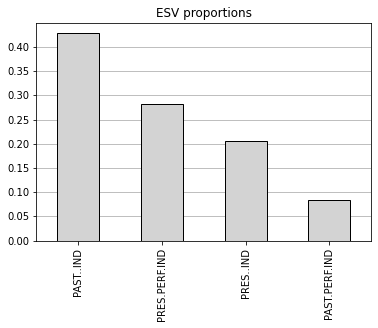

In [12]:
plot_bar_1D(esv_tam_pr, title='ESV proportions')

### NIV

In [13]:
niv_tam_ct

PAST..IND        4737
PRES.PERF.IND    2671
PRES..IND        2486
PAST.PERF.IND    1097
Name: niv_TAM, dtype: int64

In [14]:
niv_tam_pr

PAST..IND        0.430989
PRES.PERF.IND    0.243017
PRES..IND        0.226185
PAST.PERF.IND    0.099809
Name: niv_TAM, dtype: float64

In [63]:
# compare with ESV
niv_tam_pr - esv_tam_pr

PAST..IND        0.003275
PRES.PERF.IND   -0.038577
PRES..IND        0.019834
PAST.PERF.IND    0.015467
dtype: float64

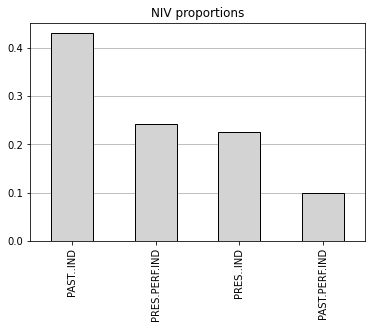

In [15]:
plot_bar_1D(niv_tam_pr, title='NIV proportions')

### ESV & NIV (agreement)

In [130]:
eng_tam_ct = eng_df[eng_df.disagree == 0].esv_TAM.value_counts()
eng_tam_pr = prop_table(eng_tam_ct)

eng_tam_ct

PAST..IND        4116
PRES.PERF.IND    2354
PRES..IND        2062
PAST.PERF.IND     782
Name: esv_TAM, dtype: int64

In [131]:
eng_tam_pr

PAST..IND        0.441915
PRES.PERF.IND    0.252738
PRES..IND        0.221387
PAST.PERF.IND    0.083960
Name: esv_TAM, dtype: float64

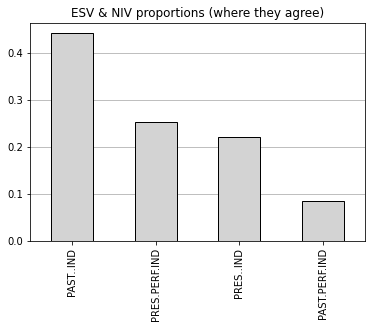

In [132]:
plot_bar_1D(eng_tam_pr, title='ESV & NIV proportions (where they agree)')

## Translation Diagreements (unidirectional)

### Run unidirectional

In [16]:
disag_df = eng_df[eng_df.esv_TAM != eng_df.niv_TAM]

disags = Analyze(disag_df, index='esv_TAM', columns='niv_TAM', fishers=False)

disags.show()

counts:


niv_TAM,PAST..IND,PRES..IND,PRES.PERF.IND,PAST.PERF.IND
esv_TAM,,,,
PRES.PERF.IND,410,293,0,38
PAST..IND,0,130,180,275
PRES..IND,77,0,127,2
PAST.PERF.IND,134,1,10,0



proportions 1:


niv_TAM,PAST..IND,PRES..IND,PRES.PERF.IND,PAST.PERF.IND
esv_TAM,,,,
PRES.PERF.IND,0.553306,0.395412,0.000000,0.051282
PAST..IND,0.000000,0.222222,0.307692,0.470085
PRES..IND,0.373786,0.000000,0.616505,0.009709
PAST.PERF.IND,0.924138,0.006897,0.068966,0.000000



proportions 2:


esv_TAM,PRES.PERF.IND,PAST..IND,PRES..IND,PAST.PERF.IND
niv_TAM,,,,
PAST..IND,0.660225,0.000000,0.123994,0.215781
PRES..IND,0.691038,0.306604,0.000000,0.002358
PRES.PERF.IND,0.000000,0.567823,0.400631,0.031546
PAST.PERF.IND,0.120635,0.873016,0.006349,0.000000


As a proportion of all disagreements rather than across rows.

In [65]:
disags_pr3 = disags.ct / disags.ct.sum().sum()

disags_pr3

niv_TAM,PAST..IND,PRES..IND,PRES.PERF.IND,PAST.PERF.IND
esv_TAM,,,,
PRES.PERF.IND,0.244484,0.174717,0.000000,0.022660
PAST..IND,0.000000,0.077519,0.107335,0.163983
PRES..IND,0.045915,0.000000,0.075730,0.001193
PAST.PERF.IND,0.079905,0.000596,0.005963,0.000000


## Translation Disagreements (unidirectional)

Rather than tracking which TAM belong to which translation, we want to count
by simple TAM interchanges between the two translations. We do that below.

In [52]:
combined_disag = (disag_df.esv_TAM + ' ' + disag_df.niv_TAM)

# do a bit of re-arranging of the strings so that we can
# ignore whether ESV/NIV has x or y and pay attention to 
# simple interchanges between TAM x and TAM y
interchanges = []

for interchange in combined_disag:
    new_i = sorted(interchange.split()) # strings remapped alphabetically
    new_i = '{} ~ {}'.format(*new_i)
    interchanges.append(new_i)

# convert back to series and build counts
interchanges = pd.Series(interchanges, index=combined_disag.index)
inter_ct = interchanges.value_counts()
inter_pr = prop_table(inter_ct)
inter_oneN = 1 / inter_pr

# add a TAM interchange column to the eng_df
eng_df['TAM_inter'] = interchanges

inter_ct

PAST..IND ~ PRES.PERF.IND        590
PRES..IND ~ PRES.PERF.IND        420
PAST..IND ~ PAST.PERF.IND        409
PAST..IND ~ PRES..IND            207
PAST.PERF.IND ~ PRES.PERF.IND     48
PAST.PERF.IND ~ PRES..IND          3
dtype: int64

In [53]:
inter_pr

PAST..IND ~ PRES.PERF.IND        0.351819
PRES..IND ~ PRES.PERF.IND        0.250447
PAST..IND ~ PAST.PERF.IND        0.243888
PAST..IND ~ PRES..IND            0.123435
PAST.PERF.IND ~ PRES.PERF.IND    0.028623
PAST.PERF.IND ~ PRES..IND        0.001789
dtype: float64

In [54]:
inter_oneN

PAST..IND ~ PRES.PERF.IND          2.842373
PRES..IND ~ PRES.PERF.IND          3.992857
PAST..IND ~ PAST.PERF.IND          4.100244
PAST..IND ~ PRES..IND              8.101449
PAST.PERF.IND ~ PRES.PERF.IND     34.937500
PAST.PERF.IND ~ PRES..IND        559.000000
dtype: float64

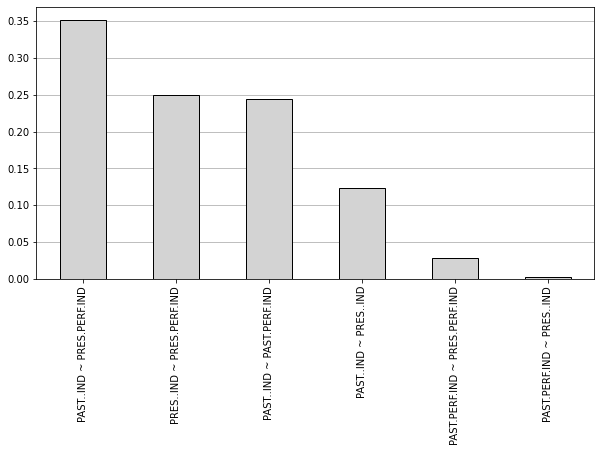

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_bar_1D(inter_pr, ax)

In [67]:
eng_df.disagree.value_counts()

0    9314
1    1677
Name: disagree, dtype: int64

### Specific verb phrases involved

In [78]:
vp_disag_ct = (disag_df.niv_TAM.value_counts() + disag_df.esv_TAM.value_counts()).sort_values(ascending=False)
vp_disag_pr = prop_table(vp_disag_ct)

vp_disag_ct

PAST..IND        1206
PRES.PERF.IND    1058
PRES..IND         630
PAST.PERF.IND     460
dtype: int64

In [79]:
vp_disag_pr

PAST..IND        0.359571
PRES.PERF.IND    0.315444
PRES..IND        0.187835
PAST.PERF.IND    0.137150
dtype: float64

Get difference of proportions:

In [82]:
vp_agree_ct = eng_df[eng_df.disagree == 0].esv_TAM.value_counts()
vp_agree_pr = prop_table(agree_ct)

vp_agree_ct

PAST..IND        4116
PRES.PERF.IND    2354
PRES..IND        2062
PAST.PERF.IND     782
Name: esv_TAM, dtype: int64

In [83]:
vp_agree_pr

PAST..IND        0.441915
PRES.PERF.IND    0.252738
PRES..IND        0.221387
PAST.PERF.IND    0.083960
Name: esv_TAM, dtype: float64

In [84]:
# now difference of proportions from
# when there is agreement
vp_disag_pr - vp_agree_pr 

PAST..IND       -0.082345
PRES.PERF.IND    0.062706
PRES..IND       -0.033552
PAST.PERF.IND    0.053190
dtype: float64

NB: present perfect is +6% here, more affected than others. Past perfect +5%.

### Counting agreement

In [61]:
eng_agree_ct = eng_df.disagree.value_counts()
eng_agree_pr = prop_table(eng_agree_ct)

eng_agree_ct

0    9314
1    1677
Name: disagree, dtype: int64

In [62]:
eng_agree_pr

0    0.847421
1    0.152579
Name: disagree, dtype: float64

### Disagreement by Genre

In [103]:
ag_genre = Analyze(eng_df[eng_df.genre.isin(main_genre)], index='genre', columns='disagree', fishers=False)

ag_genre.show()

counts:


disagree,0,1
genre,,
prose,4507,708
prophetic,2436,465
poetry,1780,387



proportions 1:


disagree,0,1
genre,,
prose,0.864238,0.135762
prophetic,0.839710,0.160290
poetry,0.821412,0.178588



proportions 2:


genre,prose,prophetic,poetry
disagree,,,
0,0.516680,0.279262,0.204058
1,0.453846,0.298077,0.248077


In [104]:
# difference proportions between agree/disagree
dp_agree = ag_genre.pr2.loc[1] - ag_genre.pr2.loc[0]

dp_agree

genre
prose       -0.062834
prophetic    0.018815
poetry       0.044019
dtype: float64

In [105]:
dp_agree['poetry'] + dp_agree['prophetic']

0.06283388742405138

In [22]:
ag_genre.oneN

disagree,0,1
genre,,
prose,1.157089,7.365819
prophetic,1.190887,6.238710
poetry,1.217416,5.599483
instruction,1.288288,4.468750
list,1.081395,13.285714


### Disagreement by Domain

counts:


disagree,0,1
domain2,,
Q,6184,1287
N,2363,322
?,629,47
D,138,21



proportions 1:


disagree,0,1
domain2,,
Q,0.827734,0.172266
N,0.880074,0.119926
?,0.930473,0.069527
D,0.867925,0.132075



proportions 2:


domain2,Q,N,?,D
disagree,,,,
0,0.663947,0.253704,0.067533,0.014816
1,0.767442,0.192010,0.028026,0.012522



Fisher's test with log transform:


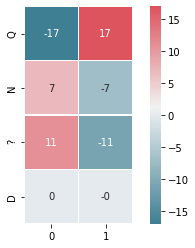

In [23]:
disc_disag = Analyze(eng_df, index='domain2', columns='disagree')

disc_disag.show()

In [92]:
# diff in prop by genre between N and Q
disc_disag.pr.loc['Q'] - disc_disag.pr.loc['N']

disagree
0   -0.052341
1    0.052341
dtype: float64

In [90]:
# diff in prop by agreement
disc_disag.pr2.loc[1] - disc_disag.pr2.loc[0]

domain2
Q    0.103495
N   -0.061695
?   -0.039507
D   -0.002294
dtype: float64

### Disagreement by Genre + Domain

counts:


,disagree,0,1
genre,domain2,,
prose,Q,2257,419
prophetic,Q,2125,435
prose,N,1992,273
poetry,Q,1579,361
prophetic,N,117,18
poetry,N,24,3



proportions 1:


,disagree,0,1
genre,domain2,,
prose,Q,0.843423,0.156577
prophetic,Q,0.830078,0.169922
prose,N,0.879470,0.120530
poetry,Q,0.813918,0.186082
prophetic,N,0.866667,0.133333
poetry,N,0.888889,0.111111



proportions 2:


genre,prose,prophetic,prose,poetry,prophetic,poetry
domain2,Q,Q,N,Q,N,N
disagree,,,,,,
0,0.278849,0.262540,0.246108,0.195083,0.014455,0.002965
1,0.277667,0.288270,0.180915,0.239231,0.011928,0.001988



Fisher's test with log transform:


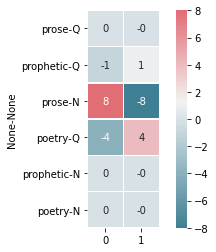

In [98]:
ag_gendom = Analyze(
    eng_df[(eng_df.domain2.isin(main_dom)) & (eng_df.genre.isin(main_genre))], 
    index=['genre', 'domain2'],
    columns='disagree',
)

ag_gendom.show()

In [100]:
# dif of props
ag_gendom.pr2.loc[1] - ag_gendom.pr2.loc[0]

genre      domain2
prose      Q         -0.001181
prophetic  Q          0.025730
prose      N         -0.065194
poetry     Q          0.044149
prophetic  N         -0.002527
poetry     N         -0.000977
dtype: float64

### TAM interchanges by Genre

counts:


TAM_inter,PAST..IND ~ PRES.PERF.IND,PRES..IND ~ PRES.PERF.IND,PAST..IND ~ PAST.PERF.IND,PAST..IND ~ PRES..IND,PAST.PERF.IND ~ PRES.PERF.IND,PAST.PERF.IND ~ PRES..IND
genre,,,,,,
prose,249,75,305,44,34,1
prophetic,180,169,46,61,9,0
poetry,132,148,18,82,5,2



proportions 1:


TAM_inter,PAST..IND ~ PRES.PERF.IND,PRES..IND ~ PRES.PERF.IND,PAST..IND ~ PAST.PERF.IND,PAST..IND ~ PRES..IND,PAST.PERF.IND ~ PRES.PERF.IND,PAST.PERF.IND ~ PRES..IND
genre,,,,,,
prose,0.351695,0.105932,0.430791,0.062147,0.048023,0.001412
prophetic,0.387097,0.363441,0.098925,0.131183,0.019355,0.000000
poetry,0.341085,0.382429,0.046512,0.211886,0.012920,0.005168



proportions 2:


genre,prose,prophetic,poetry
TAM_inter,,,
PAST..IND ~ PRES.PERF.IND,0.443850,0.320856,0.235294
PRES..IND ~ PRES.PERF.IND,0.191327,0.431122,0.377551
PAST..IND ~ PAST.PERF.IND,0.826558,0.124661,0.048780
PAST..IND ~ PRES..IND,0.235294,0.326203,0.438503
PAST.PERF.IND ~ PRES.PERF.IND,0.708333,0.187500,0.104167
PAST.PERF.IND ~ PRES..IND,0.333333,0.000000,0.666667



Fisher's test with log transform:


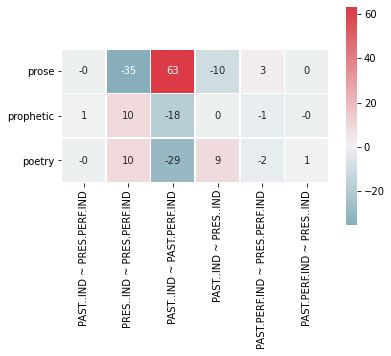

In [106]:
gen_tami = Analyze(eng_df[eng_df.genre.isin(main_genre)], index='genre', columns='TAM_inter')

gen_tami.show()

In [125]:
gen_tami_pr2_2 = gen_tami.pr2.iloc[:,:1].copy()
gen_tami_pr2_2['poetry+prophecy'] = gen_tami.pr2.iloc[:,1] + gen_tami.pr2.iloc[:,2]

max_highlighter(gen_tami_pr2_2)

genre,prose,poetry+prophecy
TAM_inter,,
PAST..IND ~ PRES.PERF.IND,0.443850,0.556150
PRES..IND ~ PRES.PERF.IND,0.191327,0.808673
PAST..IND ~ PAST.PERF.IND,0.826558,0.173442
PAST..IND ~ PRES..IND,0.235294,0.764706
PAST.PERF.IND ~ PRES.PERF.IND,0.708333,0.291667
PAST.PERF.IND ~ PRES..IND,0.333333,0.666667


In [128]:
ts.show(eng_df[eng_df.TAM_inter == 'PAST..IND ~ PRES..IND'], spread=10)

showing 10 of 207


,ref,text_full,sentence,esv_TAMspan,esv_TAM,niv_TAMspan,niv_TAM
bhsa_node,,,,,,,
229660,Isaiah 50:2,קָצְרָ֤ה,הֲקָצֹ֨ור קָצְרָ֤ה יָדִי֙ מִפְּד֔וּת,Is,PRES..IND,Was,PAST..IND
365071,Lamentations 4:9,הָיוּ֙,טֹובִ֤ים הָיוּ֙ חַלְלֵי־חֶ֔רֶב מֵֽחַלְלֵ֖י רָעָ֑ב שֶׁ֣הֵ֤ם יָז֨וּבוּ֙ מְדֻקָּרִ֔ים מִתְּנוּבֹ֖ת שָׂדָֽי׃ ס,were,PAST..IND,are,PRES..IND
40567,Exodus 21:36,נֹודַ֗ע,אֹ֣ו נֹודַ֗ע כִּ֠י שֹׁ֣ור נַגָּ֥ח הוּא֙ מִתְּמֹ֣ול שִׁלְשֹׁ֔ם,is,PRES..IND,was,PAST..IND
241171,Jeremiah 13:1,אָמַ֨ר,כֹּֽה־אָמַ֨ר יְהוָ֜ה אֵלַ֗י,says,PRES..IND,said,PAST..IND
277733,Ezekiel 26:17,נָתְנ֥וּ,הָעִ֣יר הַהֻלָּ֗לָה אֲשֶׁר֩ הָיְתָ֨ה חֲזָקָ֤ה בַיָּם֙ הִ֣יא וְיֹשְׁבֶ֔יהָ אֲשֶׁר־נָתְנ֥וּ חִתִּיתָ֖ם לְכָל־יֹושְׁבֶֽיהָ׃,imposed,PAST..IND,put,PRES..IND
218031,Isaiah 18:4,אָמַ֤ר,כִּי֩ כֹ֨ה אָמַ֤ר יְהוָה֙ אֵלַ֔י,said,PAST..IND,says,PRES..IND
319568,Psalms 55:21,שָׁלַ֣ח,שָׁלַ֣ח יָ֭דָיו בִּשְׁלֹמָ֗יו,stretched,PAST..IND,attacks,PRES..IND
322686,Psalms 73:18,הִ֝פַּלְתָּ֗ם,הִ֝פַּלְתָּ֗ם לְמַשּׁוּאֹֽות׃,make,PRES..IND,cast,PAST..IND
357720,Song_of_songs 1:9,דִּמִּיתִ֖יךְ,לְסֻסָתִי֙ בְּרִכְבֵ֣י פַרְעֹ֔ה דִּמִּיתִ֖יךְ רַעְיָתִֽי׃,compare,PRES..IND,liken,PAST..IND


### TAM interchanges by discourse type

counts:


TAM_inter,PAST..IND ~ PRES.PERF.IND,PRES..IND ~ PRES.PERF.IND,PAST..IND ~ PAST.PERF.IND,PAST..IND ~ PRES..IND,PAST.PERF.IND ~ PRES.PERF.IND,PAST.PERF.IND ~ PRES..IND
domain2,,,,,,
Q,575,397,86,180,46,3
N,3,8,297,12,2,0
?,6,10,25,6,0,0
D,6,5,1,9,0,0



proportions 1:


TAM_inter,PAST..IND ~ PRES.PERF.IND,PRES..IND ~ PRES.PERF.IND,PAST..IND ~ PAST.PERF.IND,PAST..IND ~ PRES..IND,PAST.PERF.IND ~ PRES.PERF.IND,PAST.PERF.IND ~ PRES..IND
domain2,,,,,,
Q,0.446775,0.308469,0.066822,0.139860,0.035742,0.002331
N,0.009317,0.024845,0.922360,0.037267,0.006211,0.000000
?,0.127660,0.212766,0.531915,0.127660,0.000000,0.000000
D,0.285714,0.238095,0.047619,0.428571,0.000000,0.000000



proportions 2:


domain2,Q,N,?,D
TAM_inter,,,,
PAST..IND ~ PRES.PERF.IND,0.974576,0.005085,0.010169,0.010169
PRES..IND ~ PRES.PERF.IND,0.945238,0.019048,0.023810,0.011905
PAST..IND ~ PAST.PERF.IND,0.210269,0.726161,0.061125,0.002445
PAST..IND ~ PRES..IND,0.869565,0.057971,0.028986,0.043478
PAST.PERF.IND ~ PRES.PERF.IND,0.958333,0.041667,0.000000,0.000000
PAST.PERF.IND ~ PRES..IND,1.000000,0.000000,0.000000,0.000000



Fisher's test with log transform:


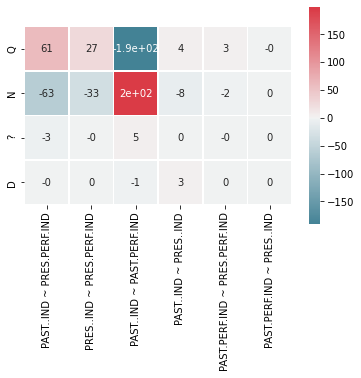

In [25]:
disc_tami = Analyze(eng_df, index='domain2', columns='TAM_inter')

disc_tami.show()

## English TAM by Context

In [147]:
engag_df = eng_df[eng_df.disagree == 0]

engdat = AnalysisSet(
    ['genre', [engag_df[engag_df.genre.isin(main_genre)]], {'index': 'esv_TAM', 'columns':'genre'}],
    ['domain', [engag_df], {'index': 'esv_TAM', 'columns': 'domain2'}],
    ['period', [engag_df], {'index': 'esv_TAM', 'columns': 'period'}],
    [
        'pergen', 
        [engag_df[engag_df.genre.isin(main_genre)]], 
        {'index': 'esv_TAM', 'columns': ['period', 'genre']}
    ],
    [
        'perdom', 
        [engag_df[(engag_df.genre.isin(main_genre)) & (engag_df.domain2.isin(main_dom))]],
        {'index': 'esv_TAM', 'columns': ['period', 'domain2']},
    ],
    [
        'gendom', 
        [engag_df[(engag_df.domain2.isin(main_dom)) & (engag_df.genre.isin(main_genre))]], 
        {'index': ['genre','domain2'], 'columns': 'esv_TAM'},
    ],
)

setting up analyses...
	done!


### Genre

counts:


genre,prose,prophetic,poetry
esv_TAM,,,
PAST..IND,2472,703,559
PRES.PERF.IND,1031,720,468
PRES..IND,350,940,723
PAST.PERF.IND,654,73,30



proportions 1:


genre,prose,prophetic,poetry
esv_TAM,,,
PAST..IND,0.662025,0.188270,0.149705
PRES.PERF.IND,0.464624,0.324470,0.210906
PRES..IND,0.173870,0.466965,0.359165
PAST.PERF.IND,0.863937,0.096433,0.039630



proportions 2:


esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND
genre,,,,
prose,0.548480,0.228755,0.077657,0.145108
prophetic,0.288588,0.295567,0.385878,0.029967
poetry,0.314045,0.262921,0.406180,0.016854



Fisher's test with log transform:


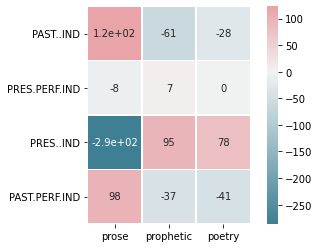

In [148]:
engdat.genre.show()

In [139]:
engdat.genre.fish

,prose,prophetic,poetry,instruction,list
PAST..IND,89.255030,-71.627093,-33.561776,0.108563,54.588954
PRES.PERF.IND,-6.595242,7.651804,0.560545,6.803566,-21.792034
PRES..IND,-246.053063,105.535599,86.559691,-3.449138,-26.411916
PAST.PERF.IND,100.436380,-33.745117,-38.676563,-5.148619,-0.442208


### domain

counts:


domain2,Q,N,?,D
esv_TAM,,,,
PAST..IND,1960,1729,379,48
PRES.PERF.IND,2258,14,42,40
PRES..IND,1823,28,170,41
PAST.PERF.IND,143,592,38,9



proportions 1:


domain2,Q,N,?,D
esv_TAM,,,,
PAST..IND,0.476190,0.420068,0.092080,0.011662
PRES.PERF.IND,0.959218,0.005947,0.017842,0.016992
PRES..IND,0.884093,0.013579,0.082444,0.019884
PAST.PERF.IND,0.182864,0.757033,0.048593,0.011509



proportions 2:


esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND
domain2,,,,
Q,0.316947,0.365136,0.294793,0.023124
N,0.731697,0.005925,0.011849,0.250529
?,0.602544,0.066773,0.270270,0.060413
D,0.347826,0.289855,0.297101,0.065217



Fisher's test with log transform:


,Q,N,?,D
PAST..IND,-257.766393,239.178226,16.130705,-1.603716
PRES.PERF.IND,inf,-321.891242,-34.961512,0.489730
PRES..IND,144.302011,-248.613364,2.550711,1.417550
PAST.PERF.IND,-184.386279,211.623141,-1.593784,-0.271161


NB: Fisher's test (+/-)np.inf replaced with 300 for plotting

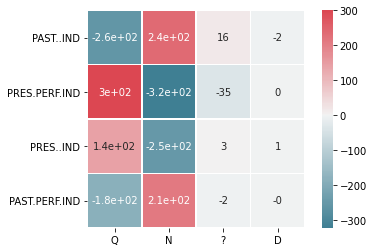

In [140]:
engdat.domain.show()

### period

counts:


period,EBH,LBH
esv_TAM,,
PAST..IND,2139,728
PRES.PERF.IND,972,171
PAST.PERF.IND,472,189
PRES..IND,335,57



proportions 1:


period,EBH,LBH
esv_TAM,,
PAST..IND,0.746076,0.253924
PRES.PERF.IND,0.850394,0.149606
PAST.PERF.IND,0.714070,0.285930
PRES..IND,0.854592,0.145408



proportions 2:


esv_TAM,PAST..IND,PRES.PERF.IND,PAST.PERF.IND,PRES..IND
period,,,,
EBH,0.545942,0.248086,0.120470,0.085503
LBH,0.635808,0.149345,0.165066,0.049782



Fisher's test with log transform:


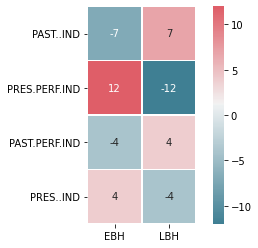

In [141]:
engdat.period.show()

### Period + Genre

counts:


period,EBH,LBH,EBH,LBH,EBH
genre,prose,prose,poetry,poetry,prophetic
esv_TAM,,,,,
PAST..IND,1852,538,76,29,2
PRES.PERF.IND,821,163,12,6,6
PAST.PERF.IND,454,176,4,2,0
PRES..IND,279,54,12,2,2



proportions 1:


period,EBH,LBH,EBH,LBH,EBH
genre,prose,prose,poetry,poetry,prophetic
esv_TAM,,,,,
PAST..IND,0.741690,0.215459,0.030437,0.011614,0.000801
PRES.PERF.IND,0.814484,0.161706,0.011905,0.005952,0.005952
PAST.PERF.IND,0.713836,0.276730,0.006289,0.003145,0.000000
PRES..IND,0.799427,0.154728,0.034384,0.005731,0.005731



proportions 2:


,esv_TAM,PAST..IND,PRES.PERF.IND,PAST.PERF.IND,PRES..IND
period,genre,,,,
EBH,prose,0.543746,0.241045,0.133294,0.081914
LBH,prose,0.577873,0.175081,0.189044,0.058002
EBH,poetry,0.730769,0.115385,0.038462,0.115385
LBH,poetry,0.743590,0.153846,0.051282,0.051282
EBH,prophetic,0.200000,0.600000,0.000000,0.200000



Fisher's test with log transform:


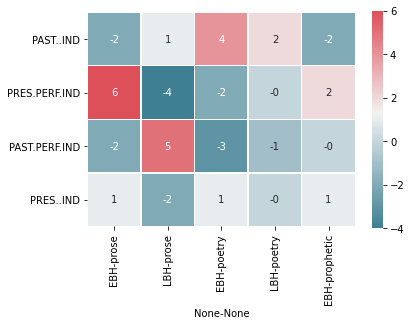

In [142]:
engdat.pergen.show()

### period + domain

counts:


period         EBH        LBH     
domain2          Q     N    N    Q
esv_TAM                           
PAST..IND      737  1049  361  138
PRES.PERF.IND  832     5    0  169
PAST.PERF.IND   72   363  150   14
PRES..IND      289     4    2   54


proportions 1:



proportions 2:



Fisher's test with log transform:


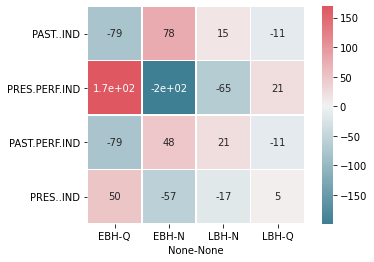

In [143]:
engdat.perdom.show()

### genre + domain

counts:


,esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND
genre,domain2,,,,
prose,Q,807,1024,344,82
prophetic,Q,576,690,825,34
prose,N,1446,5,6,535
poetry,Q,510,428,616,25
prophetic,N,61,4,17,35
poetry,N,15,4,3,2



proportions 1:


,esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND
genre,domain2,,,,
prose,Q,0.357554,0.453700,0.152415,0.036331
prophetic,Q,0.271059,0.324706,0.388235,0.016000
prose,N,0.725904,0.002510,0.003012,0.268574
poetry,Q,0.322989,0.271058,0.390120,0.015833
prophetic,N,0.521368,0.034188,0.145299,0.299145
poetry,N,0.625000,0.166667,0.125000,0.083333



proportions 2:


genre,prose,prophetic,prose,poetry,prophetic,poetry
domain2,Q,Q,N,Q,N,N
esv_TAM,,,,,,
PAST..IND,0.236310,0.168668,0.423426,0.149341,0.017862,0.004392
PRES.PERF.IND,0.475174,0.320186,0.002320,0.198608,0.001856,0.001856
PRES..IND,0.189950,0.455549,0.003313,0.340144,0.009387,0.001657
PAST.PERF.IND,0.115007,0.047686,0.750351,0.035063,0.049088,0.002805



Fisher's test with log transform:


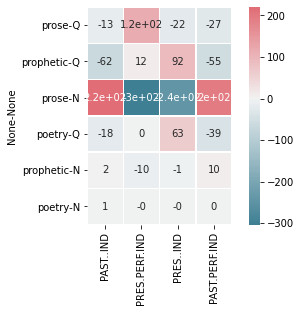

In [144]:
engdat.gendom.show()